# Lunar Landar Game Normalization

### Min Max Normalization - And Formula | y = (x – min) / (max – min) |

In [13]:
import pandas as pd
from sklearn import preprocessing

In [14]:
# importing game csv file through pandas as a game data frame
game_data_frame = pd.read_csv("lunar_landar_accurate.csv")
game_data_frame.head(5)

,x1,x2,y1,y2
0,273.750,353.5,0.593,0.000
1,273.710,353.6,-0.100,0.040
2,273.710,353.8,-0.200,0.000
3,273.670,354.1,-0.300,0.040
4,273.663,354.5,-0.400,0.007


#### Data type of columns

In [15]:
game_data_frame.dtypes

x1    float64
x2    float64
y1    float64
y2    float64
dtype: object

#### Game dataset shape

In [16]:
game_data_frame.shape

(8301, 4)

#### Maximum from each column:

In [17]:
game_data_frame.max()

x1    750.731
x2    719.332
y1      7.999
y2      6.193
dtype: float64

#### Minimum from each column:


In [18]:
game_data_frame.min()

x1   -599.480
x2     65.754
y1     -4.408
y2     -7.876
dtype: float64

#### Checking duplicate values:

In [27]:
#removing duplicates in x1 and x2
game_data_frame.drop_duplicates(subset=["x1","x2"])

,x1,x2,y1,y2
0,273.750000,353.50000,0.593000,0.000000
1,273.710000,353.60000,-0.100000,0.040000
2,273.710000,353.80000,-0.200000,0.000000
3,273.670000,354.10000,-0.300000,0.040000
4,273.663000,354.50000,-0.400000,0.007000
...,...,...,...,...
8290,13.302000,93.82600,0.237201,0.080215
8291,13.307000,85.86700,0.237201,0.080215
8292,13.312000,77.90800,0.237201,0.080215
8293,13.318000,69.94900,0.237201,0.080215


In [28]:
game_data_frame.duplicated(keep='last') # We have no any duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
8296     True
8297     True
8298     True
8299     True
8300    False
Length: 8301, dtype: bool

#### Dropping NA values:

In [29]:
game_data_frame.isna().sum() # Checking if there's IsNA or any empty value and printing the count of them

x1    0
x2    0
y1    0
y2    0
dtype: int64

In [30]:
game_data_frame['x1'].fillna((game_data_frame['x1'].mean()), inplace=True)
game_data_frame['x2'].fillna((game_data_frame['x2'].mean()), inplace=True)
game_data_frame['y1'].fillna((game_data_frame['y1'].mean()), inplace=True)
game_data_frame['y2'].fillna((game_data_frame['y2'].mean()), inplace=True)

#### Histogram of data before normalization:

<AxesSubplot:ylabel='Density'>

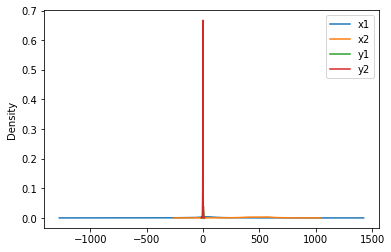

In [31]:
game_data_frame.plot.kde()

In [32]:
# Normalizing dataframe
game_values = game_data_frame.values # Only accessing values of the datafame
min_max_scaler = preprocessing.MinMaxScaler() # Choosing MinMax scaler for normalization between (0-1) 

game_values_scaled = min_max_scaler.fit_transform(game_values) # Scalling the whole data

game_data_frame = pd.DataFrame(game_values_scaled) # Got back my dataframe scaled

#### Training and Validation data partition

In [ ]:
train_size = int(len(game_data_frame) * 0.7)
test_size = len(game_data_frame) - train_size
train, test = game_data_frame[0:train_size,:], game_data_frame[train_size:len(game_data_frame),:]

#### Histogram of data after normalization:

<AxesSubplot:ylabel='Density'>

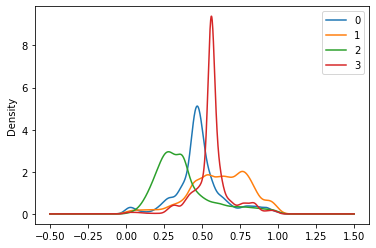

In [33]:
game_data_frame.plot.kde()

In [23]:
game_data_frame.to_csv("game_final_accurate.csv", index=False)